22843300


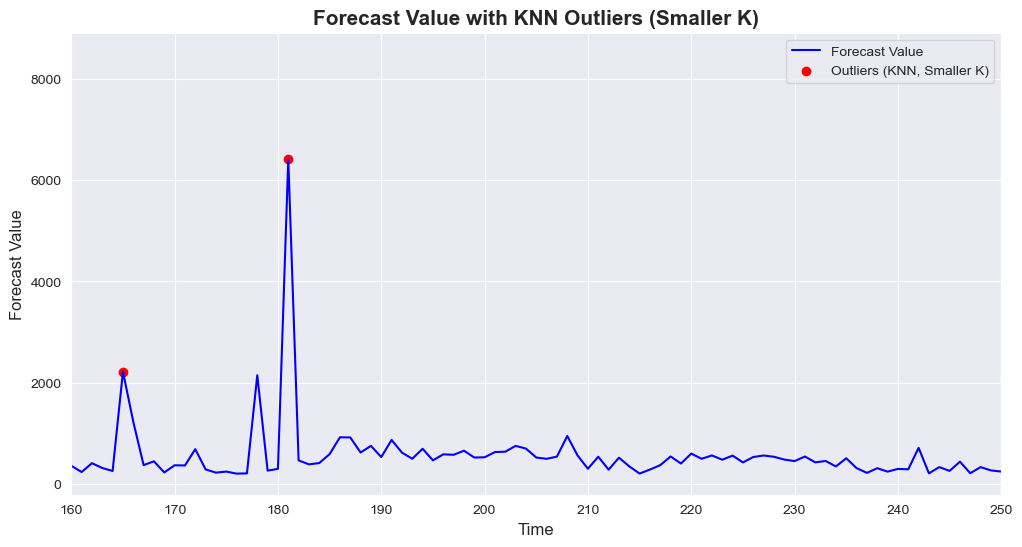

In [16]:
# 设置较小的K值
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

import time as Time
start = 0
end = 0
tflag = False
file_path = 'HUAWEI_2.csv'  # 替换为你的文件路径
new_data = pd.read_csv(file_path)


n_neighbors_smaller = 2  # 减小K值

if tflag != True:
        start = Time.perf_counter_ns()

# 使用K-NN模型
knn_smaller = NearestNeighbors(n_neighbors=n_neighbors_smaller)
knn_smaller.fit(new_data[['forecast']])

# 计算每个点到其邻居的距离
distances_smaller, _ = knn_smaller.kneighbors(new_data[['forecast']])

# 计算平均距离
mean_distance_smaller = np.mean(distances_smaller, axis=1)

# 标记离群点
outlier_indices_smaller = np.where(mean_distance_smaller > n_neighbors_smaller)[0]
new_data['Outlier_KNN_Smaller'] = False
new_data.loc[outlier_indices_smaller, 'Outlier_KNN_Smaller'] = True

if tflag != True:
        end = Time.perf_counter_ns()
        tflag = True
print(end - start)

# 重新创建折线图，并在其中标注离群点
plt.figure(figsize=(12, 6))

# 绘制forecast值的折线图
sns.lineplot(data=new_data, x=new_data.index, y='forecast', label='Forecast Value', color='blue')

# 标注离群点
outliers_knn_smaller = new_data[new_data['Outlier_KNN_Smaller']]
plt.scatter(outliers_knn_smaller.index, outliers_knn_smaller['forecast'], color='red', label='Outliers (KNN, Smaller K)')

# 设置标题和标签
plt.title('Forecast Value with KNN Outliers (Smaller K)', fontsize=15, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Forecast Value', fontsize=12)
plt.legend()
plt.xlim(160, 250)
# 显示图表
plt.show()

# 返回离群点的数量
outliers_knn_smaller_count = outliers_knn_smaller['forecast'].count()

In [17]:
TP = 0
TN = 0
FP = 0
FN = 0


for i, x in enumerate(new_data['Outlier_KNN_Smaller']):
    if x == True and new_data['label'][i] == 1:
        TP += 1
    elif x == False and new_data['label'][i] == 1:
        FN += 1
    elif x == True and new_data['label'][i] == 0:
        FP += 1
    else:
        TN += 1


acc = (TP+TN) / (TP+TN+FP+FN)
print(acc)
precision = TP / (TP + FP)
print(precision)
recall = TP / (TP + FN)
print(recall)
print(2*(precision*recall)/(precision+recall))

0.9886400171471439
1.0
0.3942857142857143
0.5655737704918032
